In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import style
style.use('ggplot')
from env import get_db_url

Exercises
Do your work for this exercise in either a python script named probability_distributions.py or a jupyter notebook named probability_distributions.ipynb.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.



A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


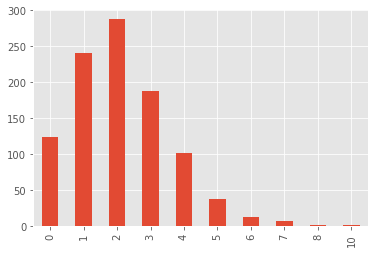

In [2]:
average_cars = 2
pd.Series(stats.poisson(average_cars).rvs(1000)).value_counts().sort_index().plot.bar()
plt.show()


What is the probability that no cars drive up in the noon hour?


In [3]:
#theoritical
average_cars = 2
stats.poisson(average_cars).cdf(0)

0.1353352832366127

In [4]:
#sim
(np.random.poisson(2,(10_000,1))<1).mean()


0.1367

What is the probability that 3 or more cars come through the drive through?


In [5]:
#theoritical
average_cars = 2
stats.poisson(average_cars).sf(2)

0.32332358381693654

In [6]:
#sim
(np.random.poisson(2,(10_000,1))>2).mean()

0.332

How likely is it that the drive through gets at least 1 car?


In [7]:
#theoritical
average_cars = 2
stats.poisson(average_cars).sf(0)

0.8646647167633873

In [8]:
#sim
(np.random.poisson(2,(10_000,1))>0).mean()

0.863

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:


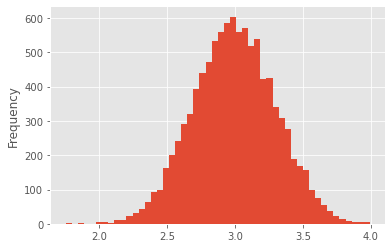

In [9]:
pd.Series(stats.norm(3,0.3).rvs(10000)).sort_values().plot.hist(bins=50)
plt.show()


What grade point average is required to be in the top 5% of the graduating class?


In [10]:
#theoritical
stats.norm(3,0.3).isf(.05)

3.4934560880854417

In [11]:
#sim
sim_grades = pd.Series(np.random.normal(3,0.3,(10_000))).sort_values()
#reset the index in the current collumn( dropping the old), in place
sim_grades.reset_index(drop=True,inplace=True) 
#what is the value at the top 5% 
sim_grades[10000*.95]

3.4838991165273243

What GPA constitutes the bottom 15% of the class?

In [12]:
#theoritical
stats.norm(3,0.3).ppf(.15)

2.689069983151863

In [13]:
#sim
sim_grades[10000*.15]

2.6899377012843124

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [185]:
#theoritical YES
print(f'{stats.norm(3,0.3).ppf(.2)}-{stats.norm(3,0.3).ppf(.3)}') 

2.7475136299281258-2.842679846187588


In [188]:
#sim  YES
np.percentile(sim_grades, [20,30])

array([2.74808132, 2.84196707])

If I have a GPA of 3.5, what percentile am I in?


In [173]:
#theoritical
stats.norm(3,0.3).cdf(3.5)

0.9522096477271853

In [174]:
#sim
#add 3.5 to grade, sort it, reset index, find index of 3.5, divide by size of series
temp = pd.Series([3.5])
sim_grades2=sim_grades.append(temp, ignore_index=True)
sim_grades2 = sim_grades2.sort_values().reset_index(drop=True)
temp_index = sim_grades2.index[sim_grades2.values==3.5].tolist()
temp_index[0]/len(sim_grades2)

0.954904509549045

In [191]:
#cleaner nicer sim
(sim_grades<3.5).mean()

0.955

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


<AxesSubplot:ylabel='Frequency'>

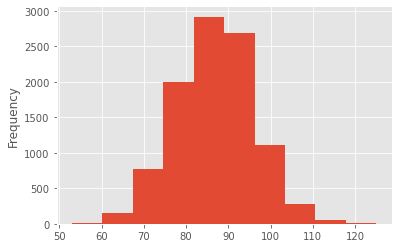

In [19]:
click_throughs = pd.Series(stats.binom(4326,.02).rvs(10000)).sort_values().reset_index(drop=True)
#click_through_rate = click_throughs/4326
click_throughs.plot.hist()

In [177]:
#theoritical
stats.binom(4326,.02).sf(96)

0.13975823631416445

In [178]:
#sim
#add 97 to series, sort it, reset index, find index of 97, divide by size of series
temp = pd.Series([97])
click_throughs2=click_throughs.append(temp, ignore_index=True)
click_throughs2 = click_throughs2.sort_values().reset_index(drop=True)
temp_index = click_throughs2.index[click_throughs2.values==97].tolist()
1- temp_index[0]/len(click_throughs2)

0.14458554144585545


You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.


Text(0.5, 0, '# Correct')

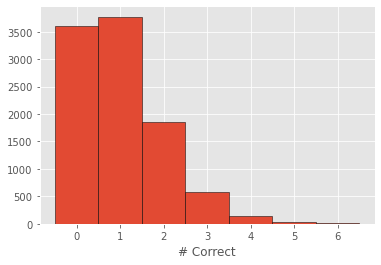

In [86]:
f, bins = np.histogram(correct_answers, bins=[0,1,2,3,4,5,6,7])

plt.bar(bins[:-1], f, width= 1, edgecolor='black')
plt.xlabel('# Correct')


What is the probability that at least one of your first 60 answers is correct?


In [23]:
#theoritical
stats.binom(60,.01).sf(0)

0.45284335760923855

In [24]:
#sim
(stats.binom(60,.01).rvs(10000) >=1).mean()

0.4533

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [25]:
n_students = round(22 * 3 * 0.9)
n_students

59

In [26]:
#theoritical
stats.binom(n_students,.03).sf(0)

0.8342199288437352

In [27]:
#sim
(stats.binom(n_students,.03).rvs(10000) >=1).mean()

0.8376

How likely is it that it goes two days without getting cleaned up? 

In [28]:
#theoritical
stats.binom(n_students*2,.03).cdf(0)

0.02748303199257623

In [29]:
#sim
(stats.binom(n_students*2,.03).rvs(10000) ==0).mean()

0.0268

All week?


In [30]:
#theoritical
stats.binom(n_students*5,.03).cdf(0)

0.00012521651388091353

In [31]:
#sim
(stats.binom(n_students*5,.03).rvs(10000) ==0).mean()

0.0001


You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


<AxesSubplot:ylabel='Frequency'>

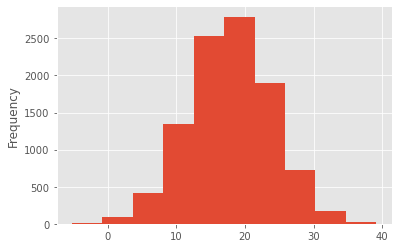

In [181]:
time_to_eat = pd.Series(60-(stats.norm(15,3).rvs(10000)*2+10+2)).sort_values().reset_index(drop=True)
time_to_eat.plot.hist()

In [182]:
#theoritical
#average time to order is people times 2, std is people std times 2, cdf value is one hour - cook time- eat time
(stats.norm(30,6)).cdf(60-10-15-2)

0.6914624612740131

In [183]:
#sim
(time_to_eat>15).mean()

0.6846


***Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.***


In [116]:
salaries = pd.read_sql(
    '''
    SELECT salary 
    FROM salaries 
    WHERE to_date > NOW()   
    ORDER BY salary
    ''', 
    get_db_url('employees'))


(array([    0.,     0.,     0.,    85.,  5114., 15106., 20114., 24552.,
        27289., 28947., 26864., 22264., 17975., 14376., 11353.,  8586.,
         6343.,  4268.,  2808.,  1921.,  1090.,   555.,   286.]),
 array([ 20000,  25000,  30000,  35000,  40000,  45000,  50000,  55000,
         60000,  65000,  70000,  75000,  80000,  85000,  90000,  95000,
        100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000]),
 <BarContainer object of 23 artists>)

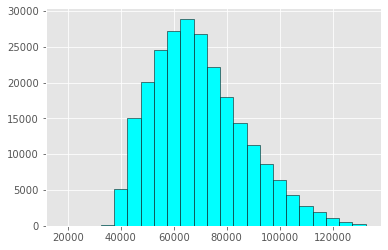

In [172]:
plt.hist(salaries, bins = range(20_000,140_000,5_000), color = 'cyan', align= 'left', edgecolor = 'black')


In [170]:
salary_mean = salaries.mean()
salary_std = salaries.std()
salary_model = pd.Series(stats.norm(salary_mean,salary_std).rvs(len(salaries))).sort_values().reset_index(drop=True)
# Make negative salaries 0
salary_model.loc[salary_model.values < 0, ] = 0
salary_model.head(10)

0       0.000000
1       0.000000
2       0.000000
3    1312.164446
4    2295.681851
5    2385.787405
6    2892.048758
7    3115.919030
8    4814.485521
9    5357.266164
dtype: float64

Text(0, 0.5, 'Frequencies')

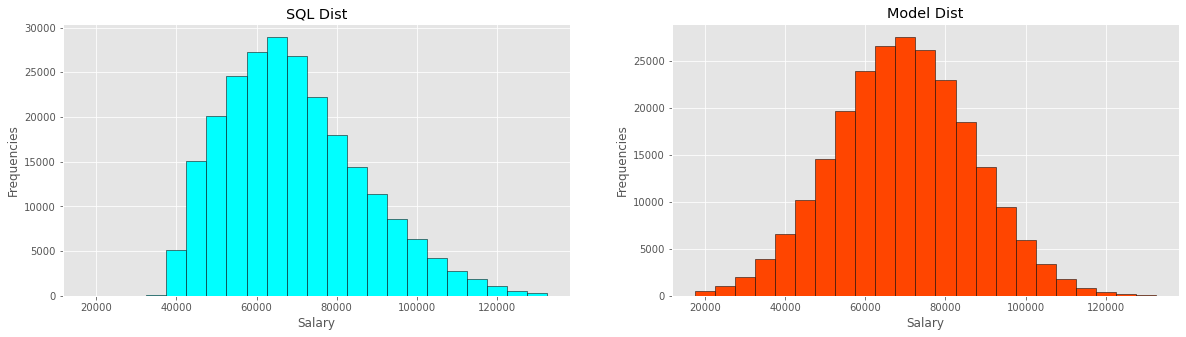

In [171]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.hist(salaries, bins = range(20_000,140_000,5_000), color = 'cyan', align= 'left', edgecolor = 'black')
plt.title('SQL Dist')
plt.xlabel('Salary')
plt.ylabel('Frequencies')
plt.subplot(1,2,2)
plt.hist(salary_model, bins = range(20_000,140_000,5_000), color = 'orangered', align= 'left', edgecolor = 'black')
plt.title('Model Dist')
plt.xlabel('Salary')
plt.ylabel('Frequencies')


What percent of employees earn less than 60,000?


In [118]:
#from SQL data
(salaries<60_000).mean()

salary    0.270573
dtype: float64

In [39]:
#from model
(salary_model<60_000).mean()

0.2484

What percent of employees earn more than 95,000?


In [40]:
#from SQL data
(salaries>95_000).mean()

salary    0.108627
dtype: float64

In [41]:
#from model
(salary_model>95_000).mean()

0.094

What percent of employees earn between 65,000 and 80,000?


In [42]:
#from SQL data
((salaries>65_000) & (salaries<80_000)).mean()

salary    0.325107
dtype: float64

In [43]:
#from model
((salary_model>65_000) & (salary_model<80_000)).mean()

0.3258

What do the top 5% of employees make?


In [60]:
#top 5% make more than
salaries.salary[int(len(salaries)*.95)]

104226

In [180]:
#better way to find percentile
np.percentile(salaries, 95)

104225.84999999998

In [184]:
#from model
stats.norm(salary_mean,salary_std).isf(.05)[0]

100484.64454102801

Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.

Be sure to run the following 2 commands from your terminal: 1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises to ensure that your stats repo has a known-good gitignore 2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises to ensure that pandas will have access to your db credentials.


